In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_palette('colorblind')
from matplotlib.pyplot import tight_layout
# ##SETTING PARAMS FOR MATPLOTLIB FIGURES
plt.rcParams.update({"figure.figsize": (6, 6),
                 "axes.facecolor": "white",
                 "axes.edgecolor": "black"})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette('colorblind'))
##set font size
font = {'family': 'sans-serif',
       'weight': 'normal',
       'size': 14}
plt.rc('font', **font)
# ##PANDAS PLOTTING
pd.plotting.register_matplotlib_converters()


### Step 1: save environment file

In [2]:
!conda env export > quasi_poisson_environment.yml

### Step 2: import modules


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# For inline plots in Jupyter
%matplotlib inline
import pandas as pd
import matplotlib as plt
import glob
import os
import xml.etree.ElementTree as ET
from datetime import datetime, timezone
from tqdm import tqdm
import codecs
import csv
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
    

### Step 2 : Import files

In [4]:
data_directory_weather = "/home/paulharford/college/project/project_data/processed/WEATHERED_warnings_2014-2023_cleaned_v4.csv"
data_directory_ihfd = "/home/paulharford/college/project/project_data/processed/WEATHERED_ihfd_clean_v2.csv"
data_directory_census = "/home/paulharford/college/project/project_data/processed/WEATHERED_census_pop_age_grp_gender_region.csv"
full_path_ihfd = os.path.abspath(data_directory_ihfd)
full_path_weather = os.path.abspath(data_directory_weather)
full_path_census = os.path.abspath(data_directory_census)

In [5]:
df_ihfd = pd.read_csv(full_path_ihfd)
df_weather = pd.read_csv(full_path_weather)
df_census = pd.read_csv(full_path_census)

### Step 3: Create full dates range for 2014 to 2023 to merge with datasets, this will be used to provide days where there are no hip fratcure incidents 

In [6]:
##set date range
regions = df_weather['region'].unique()
min_date = df_weather['date'].min()
max_date = df_weather['date'].max()

In [7]:
##set date_time tyope and create date variable
df_weather["Valid From"] = pd.to_datetime(df_weather["Valid From"])
df_weather["date"] = df_weather["Valid From"].dt.date
df_weather["date"] = pd.to_datetime(df_weather["date"])
df_weather["Valid To"] = pd.to_datetime(df_weather["Valid To"])


In [8]:
##create all dates for all years to merge with datasets so we can have days with and without events 
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
multi_index = pd.MultiIndex.from_product([regions, all_dates], names=['region', 'date'])
df_region_date = pd.DataFrame(index=multi_index).reset_index()


In [9]:
##copy full date range for hip and weather data
df_region_date_hip = df_region_date.copy()

In [10]:
df_region_date_weather = df_region_date.copy()

In [11]:
df_region_date_census = df_region_date.copy()

### Step 4: Weather data

In [12]:
df_weather.head(10)

,Issue Time,Valid From,Valid To,Warning Colour,Warning Element,Warning Text,Clare,Cork,Kerry,Limerick,...,warning_severity,weather_type,Duration_hours,date,region,counties_in_region,weather_event_density,county_weight,affected_counties_count,affected_counties_proportion
0,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and Midlands,7,1,0.142857,0,0.0
1,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and South East,7,1,0.142857,0,0.0
2,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Mid West,3,1,0.333333,0,0.0
3,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE South West,2,1,0.500000,0,0.0
4,2023-11-12 15:00:00+00:00,2023-11-13 05:00:00+00:00,2023-11-13 07:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and Monday due...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE West and North West,6,1,0.166667,0,0.0
5,2023-11-12 15:00:00+00:00,2023-11-13 03:00:00+00:00,2023-11-13 05:00:00+00:00,Red,Wind,Extremely gusty on Sunday night and early Mond...,0,0,0,0,...,Red,Wind warning,2.000000,2023-11-13,HSE Dublin and North East,5,1,0.200000,0,0.0
6,2021-12-07 12:05:59+00:00,2021-12-07 12:05:39+00:00,2021-12-07 21:00:00+00:00,Red,Red Wind,Storm Barra: Southwesterly winds later veering...,0,1,1,0,...,Red,Wind warning,8.905833,2021-12-07,HSE South West,2,1,0.500000,2,1.0
7,2017-10-16 16:02:38+00:00,2017-10-16 16:00:00+00:00,2017-10-17 01:00:00+00:00,Red,Wind,"Latest UpdateStorm Ophelia (Ex hurricane), sit...",1,1,1,1,...,Red,Wind warning,9.000000,2017-10-16,HSE West and North West,6,1,0.166667,6,1.0
8,2015-01-14 14:00:00+00:00,2015-01-14 21:00:00+00:00,2015-01-15 12:00:00+00:00,Red,Wind,Wind gusts 130 to 150km/h possible.High onshor...,1,0,1,1,...,Red,Wind warning,15.000000,2015-01-14,HSE South West,2,1,0.500000,1,0.5
9,2015-01-14 14:00:00+00:00,2015-01-14 21:00:00+00:00,2015-01-15 12:00:00+00:00,Red,Wind,Wind gusts 130 to 150km/h possible.High onshor...,1,0,1,1,...,Red,Wind warning,15.000000,2015-01-14,HSE West and North West,6,1,0.166667,3,0.5


### Step 4.1: Map weather severtiy to numeric value and aggregate weather data

In [13]:
##create a numerical mapping of the weather severity
severity_mapping = {
    'Yellow': 1,
    'Orange': 2,
    'Red': 3
}

df_weather['warning_severity_numeric'] = df_weather['warning_severity'].map(severity_mapping)

In [14]:
def aggregate_weather_data(df_weather, keep_columns=None):
    """
    Aggregate weather data by region, date, weather_type, and warning_severity while
    preserving specified additional columns.
    
    Args:
        df_weather: DataFrame containing weather data
        keep_columns: List of additional columns to preserve (beyond the groupby columns)
        
    Returns:
        Aggregated DataFrame with one row per unique region-date-weather_type-warning_severity combination
    """
    # Define default columns to keep if none provided
    if keep_columns is None:
        keep_columns = [
            'counties_in_region', 	
            'county_weight'	
         ]
    
    # Define all columns to group by
    group_cols = ['region', 'date', 'warning_phenomenon', 'warning_severity']
    
    # Define aggregation functions for numeric and other columns
    agg_dict = {
        'warning_severity_numeric': 'max'
    }
    
    # Add aggregation functions 
    for col in keep_columns:
        if col in df_weather.columns:
            # For string columns, take the first value 
            if df_weather[col].dtype == 'object':
                agg_dict[col] = 'first'
            # For boolean or integer flags (like has_multiple_events, warning_upgraded)
            elif df_weather[col].dtype in ['bool', 'int64', 'int32']:
                agg_dict[col] = 'max'
            # For numeric columns, take the max
            elif pd.api.types.is_numeric_dtype(df_weather[col]):
                agg_dict[col] = 'max'
            # For datetime columns
            elif pd.api.types.is_datetime64_dtype(df_weather[col]):
                agg_dict[col] = 'max'
            # Default to first value for any other types
            else:
                agg_dict[col] = 'first'
    
    # Group by the specified columns and aggregate
    weather_agg = df_weather.groupby(group_cols, as_index=False).agg(agg_dict)
    
    # Add the weather flag column to indicate there was an adverse wetaher event on that date 
    weather_agg['weather_event'] = 1
    
    return weather_agg

In [15]:
weather_agg = aggregate_weather_data(df_weather)

In [16]:
weather_agg.head()

,region,date,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight,weather_event
0,HSE Dublin and Midlands,2014-01-02,Wind,Yellow,1,7,0.142857,1
1,HSE Dublin and Midlands,2014-01-03,Wind,Yellow,1,7,0.142857,1
2,HSE Dublin and Midlands,2014-01-04,Snow_Ice,Yellow,1,7,0.142857,1
3,HSE Dublin and Midlands,2014-01-05,Wind,Yellow,1,7,0.142857,1
4,HSE Dublin and Midlands,2014-01-06,Wind,Orange,2,7,0.142857,1


### Step 4.2: Merge aggregated weather data with all date ranges so we have alldates with or without adverse weather events. 

In [17]:
df_weather_final = pd.merge(
    df_region_date_weather,    # adf has all dates for all regions 
    weather_agg,               
    on=['region', 'date'],    
    how='left'                # left-join so we keep all rows from date df and the weather data gets added 
)


### Step 4.3: Resolve any missing values after merge and aggregation steps

In [18]:
##after joining weather data to full date range there and NaN values, which is expected as not all days have weather events
df_weather_final['warning_severity_numeric'] = df_weather_final['warning_severity_numeric'].fillna(0)

In [19]:
df_weather_final['warning_phenomenon'] = df_weather_final['warning_phenomenon'].fillna('no_weather_type')

In [20]:
df_weather_final['warning_severity'] = df_weather_final['warning_severity'].fillna('no_weather_severity')

### Step 4.4: Add county count and county weight as not all regions have the same number of counties.

In [21]:
# Define your HSE region mapping.
hse_regions = {
    'HSE Dublin and North East': ['Cavan', 'Monaghan', 'Louth', 'Meath', 'Dublin'],
    'HSE Dublin and Midlands': ['Kildare', 'Wicklow', 'Laois', 'Offaly', 'Longford', 'Westmeath', 'Dublin'],
    'HSE Dublin and South East': ['Carlow', 'Kilkenny', 'Tipperary', 'Waterford', 'Wexford', 'Wicklow', 'Dublin'],
    'HSE Mid West': ['Clare', 'Limerick', 'Tipperary'],
    'HSE South West': ['Cork', 'Kerry'],
    'HSE West and North West': ['Donegal', 'Sligo', 'Leitrim', 'Mayo', 'Galway', 'Roscommon']
}

# List of all county columns
county_cols = [
    "Clare", "Cork", "Kerry", "Limerick", "Tipperary", "Waterford",
    "Carlow", "Dublin", "Kildare", "Kilkenny", "Laois", "Longford",
    "Louth", "Meath", "Offaly", "Westmeath", "Wexford", "Wicklow",
    "Cavan", "Donegal", "Monaghan", "Galway", "Leitrim", "Mayo",
    "Roscommon", "Sligo"
]


In [22]:
if df_weather_final['counties_in_region'].isna().any() or df_weather_final['county_weight'].isna().any():
    # Fill counties_in_region with correct values from your mapping
    df_weather_final['counties_in_region'] = df_weather_final['region'].map(
        {region: len(counties) for region, counties in hse_regions.items()}
    )
    
    # Recalculate county_weight
    df_weather_final['county_weight'] = 1 / df_weather_final['counties_in_region']

In [23]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22511 entries, 0 to 22510
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region                    22511 non-null  object        
 1   date                      22511 non-null  datetime64[ns]
 2   warning_phenomenon        22511 non-null  object        
 3   warning_severity          22511 non-null  object        
 4   warning_severity_numeric  22511 non-null  float64       
 5   counties_in_region        22511 non-null  int64         
 6   county_weight             22511 non-null  float64       
 7   weather_event             4571 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [24]:
df_weather_final['weather_event'] = df_weather_final['weather_event'].fillna(0)

### Step 4.5: Final weather dataset has per region the severity, if there was a weather event or not, the numer of counties the evenet was in and the weather type

In [25]:
df_weather_final.head(10)

,region,date,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight,weather_event
0,HSE Dublin and Midlands,2014-01-02,Wind,Yellow,1.0,7,0.142857,1.0
1,HSE Dublin and Midlands,2014-01-03,Wind,Yellow,1.0,7,0.142857,1.0
2,HSE Dublin and Midlands,2014-01-04,Snow_Ice,Yellow,1.0,7,0.142857,1.0
3,HSE Dublin and Midlands,2014-01-05,Wind,Yellow,1.0,7,0.142857,1.0
4,HSE Dublin and Midlands,2014-01-06,Wind,Orange,2.0,7,0.142857,1.0
5,HSE Dublin and Midlands,2014-01-07,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
6,HSE Dublin and Midlands,2014-01-08,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
7,HSE Dublin and Midlands,2014-01-09,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
8,HSE Dublin and Midlands,2014-01-10,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0
9,HSE Dublin and Midlands,2014-01-11,no_weather_type,no_weather_severity,0.0,7,0.142857,0.0


### Step 5: Irish hip fracture data

### Step 5.1: Change "Adm_First_Pres_Hosp_DateTime" to date as "date is one of our common features across datasets"

In [26]:
df_ihfd["Adm_First_Pres_Hosp_DateTime"] = pd.to_datetime(df_ihfd["Adm_First_Pres_Hosp_DateTime"])
df_ihfd["date"] = df_ihfd["Adm_First_Pres_Hosp_DateTime"].dt.date
# convert to a pandas datetime if you prefer consistency
df_ihfd["date"] = pd.to_datetime(df_ihfd["date"])

In [27]:
df_ihfd.head()

,region,NOCA_TraumaPeriodDay,Adm_First_Pres_Hosp_DateTime,NOCA_FirstPresPeriodDay,age_group,gender,LOS,Adm_Trauma_TYPE,Adm_Ward_Type,Adm_Pre_Frac_Indoor,...,Adm_Asa_Grade,Adm_Anaesthesia,Adm_Surgery_Delay_Reason,Adm_Mobilised,Adm_Pressure_Ulcers,Adm_Spec_Falls_Assess,Adm_Bone_Protect_Med,Adm_Multi_Rehab_Assess,date,year
0,HSE Mid West,AM,2016-09-06,PM,70-74,Female,12,2.0,1.0,2.0,...,3.0,5.0,7.0,1.0,2.0,1.0,1.0,1.0,2016-09-06,2016
1,HSE Mid West,AM,2016-09-15,Night,85 years and over,Female,4,2.0,1.0,2.0,...,2.0,5.0,0.0,1.0,2.0,1.0,1.0,1.0,2016-09-15,2016
2,HSE Mid West,AM,2016-09-14,AM,75-79,Male,6,2.0,1.0,2.0,...,2.0,5.0,0.0,1.0,2.0,1.0,5.0,1.0,2016-09-14,2016
3,HSE Mid West,AM,2016-09-04,AM,85 years and over,Female,16,2.0,1.0,2.0,...,3.0,5.0,0.0,1.0,2.0,1.0,1.0,1.0,2016-09-04,2016
4,HSE Mid West,AM,2016-08-23,Night,65-69,Male,29,2.0,1.0,2.0,...,3.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,2016-08-23,2016


### Step 5.2: Filter date range - 2014 to end of 2023

In [28]:
df_ihfd_filtered = df_ihfd[
    (df_ihfd['date'] >= '2014-01-01') & 
    (df_ihfd['date'] <= '2023-12-31').copy()
]

In [29]:
nan_counts = df_ihfd_filtered.isna().sum()
print(nan_counts)

region                          0
NOCA_TraumaPeriodDay            0
Adm_First_Pres_Hosp_DateTime    0
NOCA_FirstPresPeriodDay         0
age_group                       0
gender                          0
LOS                             0
Adm_Trauma_TYPE                 0
Adm_Ward_Type                   0
Adm_Pre_Frac_Indoor             0
Adm_PRE_Frac_Outdoor            0
Adm_Pre_Frac_Shop               0
Adm_Pre_Frac_Number             0
Adm_Fracture_Type               0
Adm_Pathological                0
Adm_Fragility                   0
Adm_Pre_OP_Med_Assess           0
Adm_Ger_Acute_Assess            0
Adm_Operation                   0
Adm_Asa_Grade                   0
Adm_Anaesthesia                 0
Adm_Surgery_Delay_Reason        0
Adm_Mobilised                   0
Adm_Pressure_Ulcers             0
Adm_Spec_Falls_Assess           0
Adm_Bone_Protect_Med            0
Adm_Multi_Rehab_Assess          0
date                            0
year                            0
dtype: int64


### Step 5.3: Check rates in my datset against teh NOCA report form 2022

In [30]:
# Count hip fractures by year for all regions
## sanity check to see what the numbers are in my dataset against the 2022 noca report 
# Filter for the specific years we want
target_years = [2018, 2020, 2022]

# Create a date column with just the year
df_ihfd['year'] = pd.to_datetime(df_ihfd['date']).dt.year

# Get counts by year (counting rows since each row is an event)
yearly_totals = df_ihfd[df_ihfd['year'].isin(target_years)].groupby('year').size().reset_index()
yearly_totals.columns = ['Year', 'Total Hip Fractures']

# Get counts by region and year
region_year_counts = df_ihfd[df_ihfd['year'].isin(target_years)].pivot_table(
    index='region', 
    columns='year', 
    values='date',  # Any column would work here since we're just counting
    aggfunc='count',
    fill_value=0
).reset_index()

# Add row for totals
totals_row = pd.DataFrame({
    'region': ['All Regions'],
    **{year: [yearly_totals[yearly_totals['Year']==year]['Total Hip Fractures'].values[0]] for year in target_years}
})

# Combine regional data with totals
final_counts = pd.concat([region_year_counts, totals_row], ignore_index=True)

# Display the results
print("Hip Fractures by Region and Year:\n")
print(final_counts)

# Compare with provided reference numbers
print("\nReference Counts:")
print(f"2018: 3751 | Your data: {yearly_totals[yearly_totals['Year']==2018]['Total Hip Fractures'].values[0]}")
print(f"2020: 3666 | Your data: {yearly_totals[yearly_totals['Year']==2020]['Total Hip Fractures'].values[0]}")
print(f"2022: 3909 | Your data: {yearly_totals[yearly_totals['Year']==2022]['Total Hip Fractures'].values[0]}")

Hip Fractures by Region and Year:

                      region  2018  2020  2022
0    HSE Dublin and Midlands   576   566   691
1  HSE Dublin and North East   819   790   980
2  HSE Dublin and South East   773   700   667
3               HSE Mid West   162   326   352
4             HSE South West   606   593   576
5    HSE West and North West   612   648   696
6                All Regions  3548  3623  3962

Reference Counts:
2018: 3751 | Your data: 3548
2020: 3666 | Your data: 3623
2022: 3909 | Your data: 3962


### Step 5.4: Aggregate hip data 

In [31]:
hip_agg = (
    df_ihfd_filtered
    .groupby(['region', 'date', 'age_group', 'gender'])
    .agg(
        hip_fracture_count=('date', 'count')
    )
    .reset_index()
)


In [32]:
hip_agg.head()


,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1
1,HSE Dublin and Midlands,2014-01-04,65-69,Female,1
2,HSE Dublin and Midlands,2014-01-04,80-84,Female,1
3,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2
4,HSE Dublin and Midlands,2014-01-06,65-69,Male,1


### Step 5.6: Merge date range df with hip data 

In [33]:
df_hip_final = pd.merge(
    df_region_date_hip,          # all region-date combos
    hip_agg,               
    on=['region', 'date'],   
    how='left'           
)

In [34]:
df_hip_final.head(15)

,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0
1,HSE Dublin and Midlands,2014-01-03,NaN,NaN,NaN
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0
5,HSE Dublin and Midlands,2014-01-05,NaN,NaN,NaN
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0
7,HSE Dublin and Midlands,2014-01-07,NaN,NaN,NaN
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0


### Step 5.7: Resolve any missing values after merge and aggregation steps

In [35]:
df_hip_final['hip_fracture_count'] = df_hip_final['hip_fracture_count'].fillna(0)

In [36]:
df_hip_final['age_group'] = df_hip_final['age_group'].fillna('no_hip_fractures')

In [37]:
df_hip_final['gender'] = df_hip_final['gender'].fillna('no_gender')

In [38]:
df_hip_final.head(15)

,region,date,age_group,gender,hip_fracture_count
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0
1,HSE Dublin and Midlands,2014-01-03,no_hip_fractures,no_gender,0.0
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0
5,HSE Dublin and Midlands,2014-01-05,no_hip_fractures,no_gender,0.0
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0
7,HSE Dublin and Midlands,2014-01-07,no_hip_fractures,no_gender,0.0
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0


### Step 6: Merge final hip and weather data

In [39]:
df_hip_weather = df_hip_final.merge(
    df_weather_final[['region', 'date', 'weather_event', 'warning_phenomenon', 'warning_severity', 
                'warning_severity_numeric', 'counties_in_region', 'county_weight']],
    on=['region', 'date'],
    how='left'
)

In [40]:
df_hip_weather.head(10)

,region,date,age_group,gender,hip_fracture_count,weather_event,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,county_weight
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0,1.0,Wind,Yellow,1.0,7,0.142857
1,HSE Dublin and Midlands,2014-01-03,no_hip_fractures,no_gender,0.0,1.0,Wind,Yellow,1.0,7,0.142857
2,HSE Dublin and Midlands,2014-01-04,65-69,Female,1.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
3,HSE Dublin and Midlands,2014-01-04,80-84,Female,1.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
4,HSE Dublin and Midlands,2014-01-04,85 years and over,Female,2.0,1.0,Snow_Ice,Yellow,1.0,7,0.142857
5,HSE Dublin and Midlands,2014-01-05,no_hip_fractures,no_gender,0.0,1.0,Wind,Yellow,1.0,7,0.142857
6,HSE Dublin and Midlands,2014-01-06,65-69,Male,1.0,1.0,Wind,Orange,2.0,7,0.142857
7,HSE Dublin and Midlands,2014-01-07,no_hip_fractures,no_gender,0.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857
8,HSE Dublin and Midlands,2014-01-08,75-79,Female,1.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857
9,HSE Dublin and Midlands,2014-01-09,85 years and over,Female,1.0,0.0,no_weather_type,no_weather_severity,0.0,7,0.142857


### Step 6.1: Resolve any missing values after merge and aggregation steps

In [41]:
df_hip_weather['warning_severity'] = df_hip_weather['warning_severity'].fillna('no_warning_severity')

In [42]:
df_hip_weather['warning_phenomenon'] = df_hip_weather['warning_phenomenon'].fillna('no_weather_type')

In [43]:
df_hip_weather['warning_severity_numeric'] = df_hip_weather['warning_severity_numeric'].fillna(0)

In [44]:
df_hip_weather['weather_event'] = df_hip_weather['weather_event'].fillna(0)

In [45]:
df_hip_weather.isna().sum()


region                      0
date                        0
age_group                   0
gender                      0
hip_fracture_count          0
weather_event               0
warning_phenomenon          0
warning_severity            0
warning_severity_numeric    0
counties_in_region          0
county_weight               0
dtype: int64

### Step 7: Census Data

In [46]:
df_census.head(10)

,region,date,age_group,female,male,total,year
0,HSE Dublin and Midlands,2014-01-01,60 - 64,23070,23499,46569,2014
1,HSE Dublin and Midlands,2014-01-02,60 - 64,23070,23499,46569,2014
2,HSE Dublin and Midlands,2014-01-03,60 - 64,23070,23499,46569,2014
3,HSE Dublin and Midlands,2014-01-04,60 - 64,23070,23499,46569,2014
4,HSE Dublin and Midlands,2014-01-05,60 - 64,23070,23499,46569,2014
5,HSE Dublin and Midlands,2014-01-06,60 - 64,23070,23499,46569,2014
6,HSE Dublin and Midlands,2014-01-07,60 - 64,23070,23499,46569,2014
7,HSE Dublin and Midlands,2014-01-08,60 - 64,23070,23499,46569,2014
8,HSE Dublin and Midlands,2014-01-09,60 - 64,23070,23499,46569,2014
9,HSE Dublin and Midlands,2014-01-10,60 - 64,23070,23499,46569,2014


### Step 7.1: Resolve issues with feature age_group in the census and hip_weather data

In [47]:
print(sorted(df_census['age_group'].unique()))

['60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 and over']


In [48]:
print(sorted(df_hip_weather['age_group'].unique()))

['60-64', '65-69', '70-74', '75-79', '80-84', '85 years and over', 'no_hip_fractures']


In [49]:
df_hip_weather['date'] = pd.to_datetime(df_hip_weather['date'])
df_census['date'] = pd.to_datetime(df_census['date'])

In [50]:
df_census.head()

,region,date,age_group,female,male,total,year
0,HSE Dublin and Midlands,2014-01-01,60 - 64,23070,23499,46569,2014
1,HSE Dublin and Midlands,2014-01-02,60 - 64,23070,23499,46569,2014
2,HSE Dublin and Midlands,2014-01-03,60 - 64,23070,23499,46569,2014
3,HSE Dublin and Midlands,2014-01-04,60 - 64,23070,23499,46569,2014
4,HSE Dublin and Midlands,2014-01-05,60 - 64,23070,23499,46569,2014


In [51]:
print(sorted(df_census['age_group'].unique()))

['60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 and over']


In [52]:
# Create a mapping dictionary to convert census age groups to match hip weather format
# Note: This maps FROM census format TO hip_weather format
age_group_mapping = {
    '60 - 64': '60-64',
    '65 - 69': '65-69',
    '70 - 74': '70-74',
    '75 - 79': '75-79',
    '80 - 84': '80-84',
    '85 and over': '85 years and over'
}

# Apply mapping to the age_group column in df_census
df_census['age_group'] = df_census['age_group'].map(age_group_mapping)

# Verify the mapping worked correctly
print("Census age groups after mapping:")
for age in sorted(df_census['age_group'].unique()):
    print(f"  '{age}'")

# Ensure dates are in the same format
df_hip_weather['date'] = pd.to_datetime(df_hip_weather['date']).dt.date
df_census['date'] = pd.to_datetime(df_census['date']).dt.date

Census age groups after mapping:
  '60-64'
  '65-69'
  '70-74'
  '75-79'
  '80-84'
  '85 years and over'


### Step 7.2: Merge census and hip_weather data and add population column for combined pop per region 

In [53]:
# merge using the updated age_group column
df_final = df_hip_weather.merge(
    df_census[['region', 'date', 'age_group', 'female', 'male', 'total']],
    on=['region', 'date', 'age_group'],
    how='left'
)

# Add the population column based on gender
df_final['population'] = df_final.apply(
    lambda row: row['female'] if row['gender'] == 'Female' else
                row['male'] if row['gender'] == 'Male' else
                row['total'],
    axis=1
)

# Check results
print(f"\nTotal rows in final dataset: {len(df_final)}")
print(f"Rows with population data: {df_final['population'].notna().sum()}")
print(df_final[['region', 'date', 'age_group', 'gender', 'female', 'male', 'total', 'population']].head())


Total rows in final dataset: 37004
Rows with population data: 31539
                    region        date          age_group     gender   female  \
0  HSE Dublin and Midlands  2014-01-02              65-69     Female  19327.0   
1  HSE Dublin and Midlands  2014-01-03   no_hip_fractures  no_gender      NaN   
2  HSE Dublin and Midlands  2014-01-04              65-69     Female  19327.0   
3  HSE Dublin and Midlands  2014-01-04              80-84     Female   8096.0   
4  HSE Dublin and Midlands  2014-01-04  85 years and over     Female   7694.0   

      male    total  population  
0  20035.0  39362.0     19327.0  
1      NaN      NaN         NaN  
2  20035.0  39362.0     19327.0  
3   6635.0  14731.0      8096.0  
4   5328.0  13022.0      7694.0  


In [54]:
df_final.isnull().sum()

region                         0
date                           0
age_group                      0
gender                         0
hip_fracture_count             0
weather_event                  0
warning_phenomenon             0
warning_severity               0
warning_severity_numeric       0
counties_in_region             0
county_weight                  0
female                      5465
male                        5465
total                       5465
population                  5465
dtype: int64

### Step 7.3 Resolve any missing values after merge and aggregation steps

In [55]:
# Identify the rows with "no_gender"
no_fracture_rows = df_final[df_final['gender'] == 'no_gender'].copy()

# Remove these rows from the original dataframe
df_final_cleaned = df_final[df_final['gender'] != 'no_gender'].copy()

# Calculate the proportion of population by gender and age group within each region
population_props = df_final_cleaned.groupby(['region', 'gender', 'age_group'])['population'].mean().reset_index()
total_by_region = population_props.groupby('region')['population'].sum().reset_index()
population_props = population_props.merge(total_by_region, on='region', suffixes=('', '_total'))
population_props['proportion'] = population_props['population'] / population_props['population_total']

# Step 4: Create a list to store new rows
new_rows = []

# For each "no_fracture" row, create corresponding rows for each demographic group
for _, row in no_fracture_rows.iterrows():
    region = row['region']
    date = row['date']
    weather_event = row['weather_event']
    warning_phenomenon = row['warning_phenomenon']
    warning_severity = row['warning_severity']
    warning_severity_numeric = row['warning_severity_numeric']
    counties_in_region = row['counties_in_region']
    county_weight = row['county_weight']
    
    # Get demographic breakdowns for this region
    region_demographics = population_props[population_props['region'] == region]
    
    # Create a new row for each demographic group in this region
    for _, demo_row in region_demographics.iterrows():
        gender = demo_row['gender']
        age_group = demo_row['age_group']
        population = demo_row['population']
        
        # Create new row with appropriate demographics but zero fractures
        new_row = row.copy()
        new_row['gender'] = gender
        new_row['age_group'] = age_group
        new_row['hip_fracture_count'] = 0
        new_row['population'] = population
        new_row['log_population'] = np.log(population) if population > 0 else np.nan
        
        # Add additional columns as needed
        if 'female' in df_final.columns:
            new_row['female'] = population if gender == 'Female' else 0
        if 'male' in df_final.columns:
            new_row['male'] = population if gender == 'Male' else 0
        if 'total' in df_final.columns:
            new_row['total'] = population
            
        # Add the new row to our list
        new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
expanded_rows = pd.DataFrame(new_rows)

# Combine with the cleaned DataFrame
df_final_expanded = pd.concat([df_final_cleaned, expanded_rows], ignore_index=True)

# Sort by region, date, gender, age_group for clarity
df_final_expanded = df_final_expanded.sort_values(['region', 'date', 'gender', 'age_group'])

# Step 9: Check the results
print(f"Original dataframe shape: {df_final.shape}")
print(f"Expanded dataframe shape: {df_final_expanded.shape}")
print(f"Number of no_hip_fractures rows: {len(no_fracture_rows)}")

Original dataframe shape: (37004, 15)
Expanded dataframe shape: (97119, 16)
Number of no_hip_fractures rows: 5465


### Step 7.4: add log of popultion value

In [56]:
df_final_expanded['log_population'] = np.log(df_final_expanded['population'])

In [57]:
df_final_expanded.isnull().sum()

region                      0
date                        0
age_group                   0
gender                      0
hip_fracture_count          0
weather_event               0
warning_phenomenon          0
warning_severity            0
warning_severity_numeric    0
counties_in_region          0
county_weight               0
female                      0
male                        0
total                       0
population                  0
log_population              0
dtype: int64

### Step 8: Add additional features to help improve model 

In [58]:
# Add month number
df_final_expanded['month'] = pd.DatetimeIndex(df_final_expanded['date']).month

# Create seasons winter,summer etc 
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # months 9, 10, 11
        return 'Autumn'

df_final_expanded['season'] = df_final_expanded['month'].apply(assign_season)

# Create dummy variables for seasons
df_final_expanded['is_winter'] = (df_final_expanded['season'] == 'Winter').astype(int)
df_final_expanded['is_spring'] = (df_final_expanded['season'] == 'Spring').astype(int)
df_final_expanded['is_summer'] = (df_final_expanded['season'] == 'Summer').astype(int)
df_final_expanded['is_autumn'] = (df_final_expanded['season'] == 'Autumn').astype(int)

In [59]:
# Sort by region and date
df_final_expanded = df_final_expanded.sort_values(['region', 'date'])

# Create lagged variables based on warning severity
# First, create indicator for orange warnings
df_final_expanded['orange_warning'] = ((df_final_expanded['warning_severity'] == 'Orange') | 
                             (df_final_expanded['warning_severity_numeric'] == 2)).astype(int)

# Create indicator for red warnings
df_final_expanded['red_warning'] = ((df_final_expanded['warning_severity'] == 'Red') | 
                           (df_final_expanded['warning_severity_numeric'] == 3)).astype(int)

# Create indicator for yellow warnings
df_final_expanded['yellow_warning'] = ((df_final_expanded['warning_severity'] == 'Yellow') | 
                           (df_final_expanded['warning_severity_numeric'] == 1)).astype(int)

# Within each region, create lagged variables
df_final_expanded['orange_warning_lag'] = df_final_expanded.groupby('region')['orange_warning'].shift(1)
df_final_expanded['red_warning_lag'] = df_final_expanded.groupby('region')['red_warning'].shift(1)

In [60]:
# Create broader weather categories
df_final_expanded['cold_weather'] = df_final_expanded['warning_phenomenon'].isin(
    ['Snow_Ice', 'Ice', 'Low-Temperature', 'Low-Temperature_Ice', 'Fog']).astype(int)

df_final_expanded['wind_weather'] = df_final_expanded['warning_phenomenon'].isin(['Wind']).astype(int)

df_final_expanded['precipitation'] = df_final_expanded['warning_phenomenon'].isin(
    ['Rainfall', 'Thunder', 'Hail']).astype(int)

df_final_expanded['heat_weather'] = df_final_expanded['warning_phenomenon'].isin(['High-Temperature']).astype(int)

df_final_expanded['no_adverse_weather'] = df_final_expanded['warning_phenomenon'].isin(
    ['no_weather_type']).astype(int)


# Create lagged variables for each type
df_final_expanded['cold_lag'] = df_final_expanded.groupby('region')['cold_weather'].shift(1)
df_final_expanded['wind_lag'] = df_final_expanded.groupby('region')['wind_weather'].shift(1)
df_final_expanded['precip_lag'] = df_final_expanded.groupby('region')['precipitation'].shift(1)
df_final_expanded['heat_lag'] = df_final_expanded.groupby('region')['heat_weather'].shift(1)

In [61]:
# Check for NaN values in new columns
nan_counts = {
    'cold_weather': df_final_expanded['cold_weather'].isna().sum(),
    'wind_weather': df_final_expanded['wind_weather'].isna().sum(),
    'precipitation': df_final_expanded['precipitation'].isna().sum(),
    'heat_weather': df_final_expanded['heat_weather'].isna().sum(),
    'cold_lag': df_final_expanded['cold_lag'].isna().sum(),
    'wind_lag': df_final_expanded['wind_lag'].isna().sum(),
    'precip_lag': df_final_expanded['precip_lag'].isna().sum(),
    'heat_lag': df_final_expanded['heat_lag'].isna().sum(),
    'is_winter': df_final_expanded['is_winter'].isna().sum(),
    'is_spring': df_final_expanded['is_spring'].isna().sum(),
    'is_summer': df_final_expanded['is_summer'].isna().sum(),
    'is_autumn': df_final_expanded['is_autumn'].isna().sum(),
    'orange_warning_lag': df_final_expanded['orange_warning_lag'].isna().sum(),
    'red_warning_lag': df_final_expanded['red_warning_lag'].isna().sum()
}

print("NaN counts in new features:")
for feature, count in nan_counts.items():
    print(f"{feature}: {count}")


NaN counts in new features:
cold_weather: 0
wind_weather: 0
precipitation: 0
heat_weather: 0
cold_lag: 6
wind_lag: 6
precip_lag: 6
heat_lag: 6
is_winter: 0
is_spring: 0
is_summer: 0
is_autumn: 0
orange_warning_lag: 6
red_warning_lag: 6


In [62]:
# Fill NaN values with 0 for lag variables
lag_columns = ['cold_lag', 'wind_lag', 'precip_lag', 'heat_lag', 'orange_warning_lag', 'red_warning_lag']
df_final_expanded[lag_columns] = df_final_expanded[lag_columns].fillna(0)

### Step 8.1: Final dataset, check for correlating features 

In [63]:
df_final_expanded.head(15)

,region,date,age_group,gender,hip_fracture_count,weather_event,warning_phenomenon,warning_severity,warning_severity_numeric,counties_in_region,...,red_warning_lag,cold_weather,wind_weather,precipitation,heat_weather,no_adverse_weather,cold_lag,wind_lag,precip_lag,heat_lag
0,HSE Dublin and Midlands,2014-01-02,65-69,Female,1.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,0.0,0.0,0.0
31539,HSE Dublin and Midlands,2014-01-03,60-64,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31540,HSE Dublin and Midlands,2014-01-03,65-69,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31541,HSE Dublin and Midlands,2014-01-03,70-74,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31542,HSE Dublin and Midlands,2014-01-03,75-79,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31543,HSE Dublin and Midlands,2014-01-03,80-84,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31544,HSE Dublin and Midlands,2014-01-03,85 years and over,Female,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31545,HSE Dublin and Midlands,2014-01-03,60-64,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31546,HSE Dublin and Midlands,2014-01-03,65-69,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0
31547,HSE Dublin and Midlands,2014-01-03,70-74,Male,0.0,1.0,Wind,Yellow,1.0,7,...,0.0,0,1,0,0,0,0.0,1.0,0.0,0.0


Correlations with hip_fracture_count:
hip_fracture_count          1.000000
total                       0.453265
female                      0.344067
male                        0.241170
counties_in_region          0.179600
is_winter                   0.039470
cold_weather                0.031975
cold_lag                    0.031811
orange_warning              0.020927
orange_warning_lag          0.018827
warning_severity_numeric    0.014164
weather_event               0.013177
yellow_warning              0.006588
heat_weather                0.000602
wind_lag                   -0.000659
wind_weather               -0.001639
heat_lag                   -0.001804
log_population             -0.002251
precip_lag                 -0.003663
is_spring                  -0.004264
precipitation              -0.005347
month                      -0.008808
is_autumn                  -0.009603
red_warning_lag            -0.010515
no_adverse_weather         -0.013177
red_warning                -0.013222


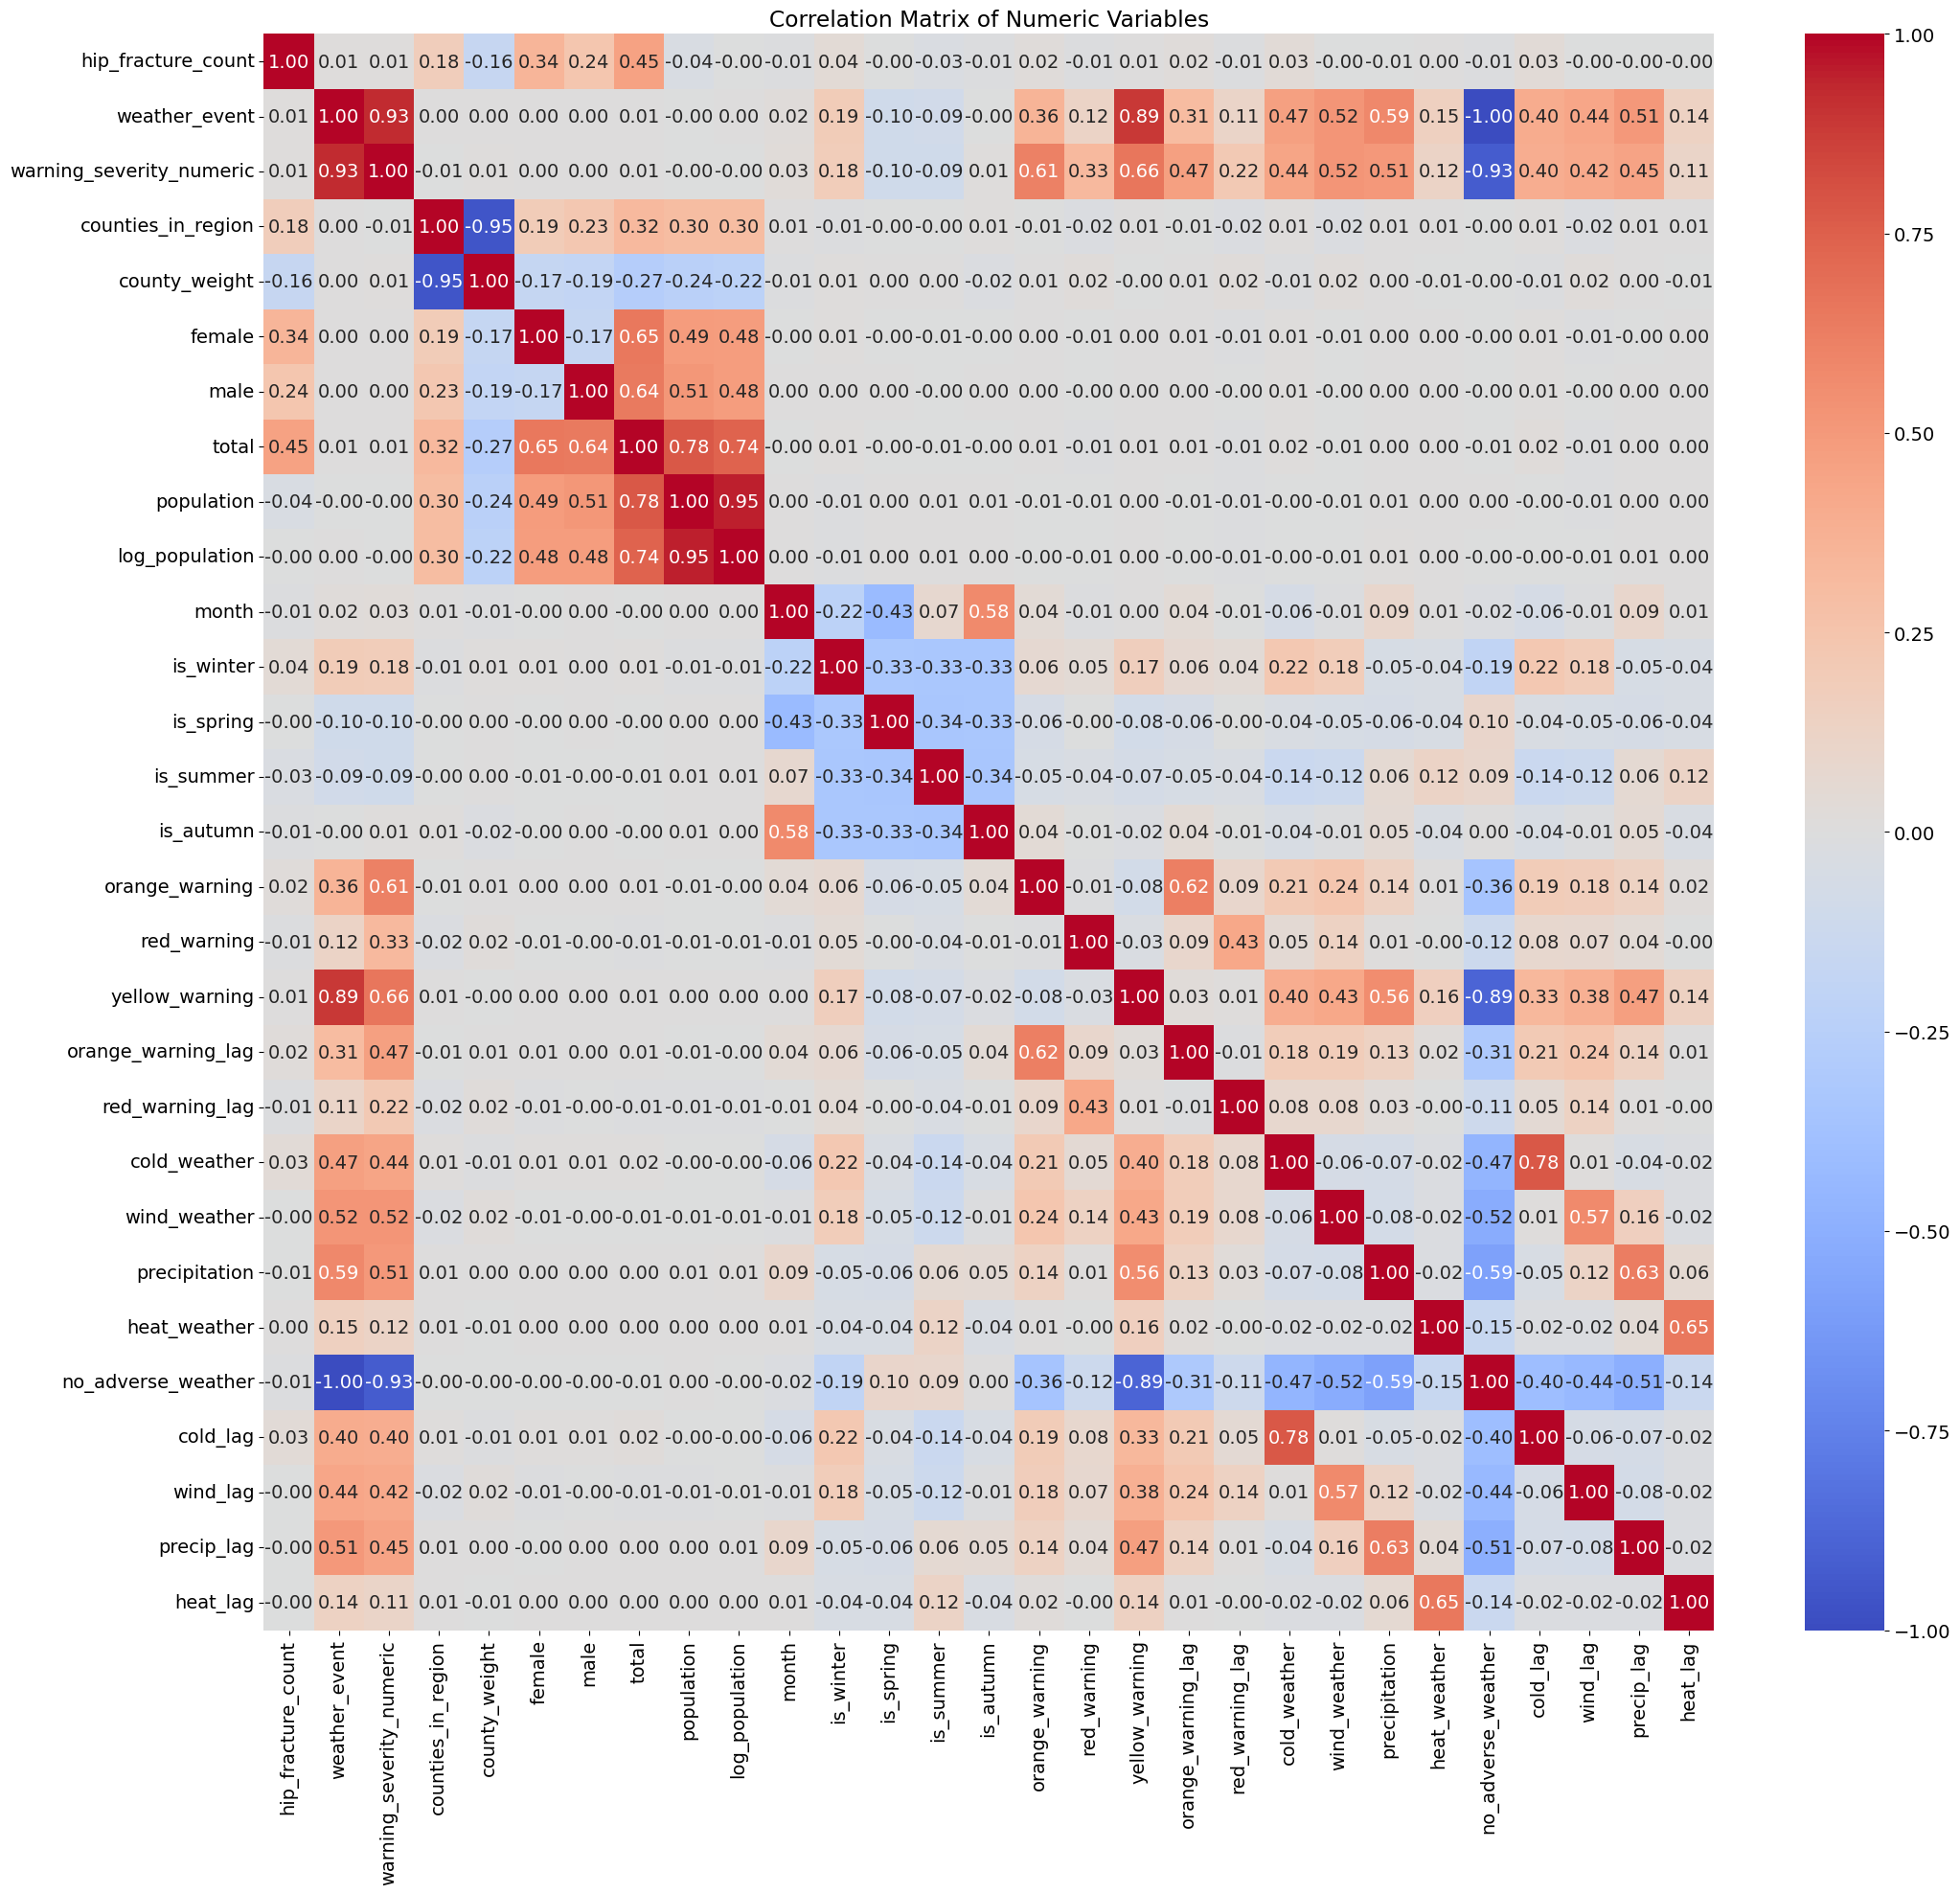

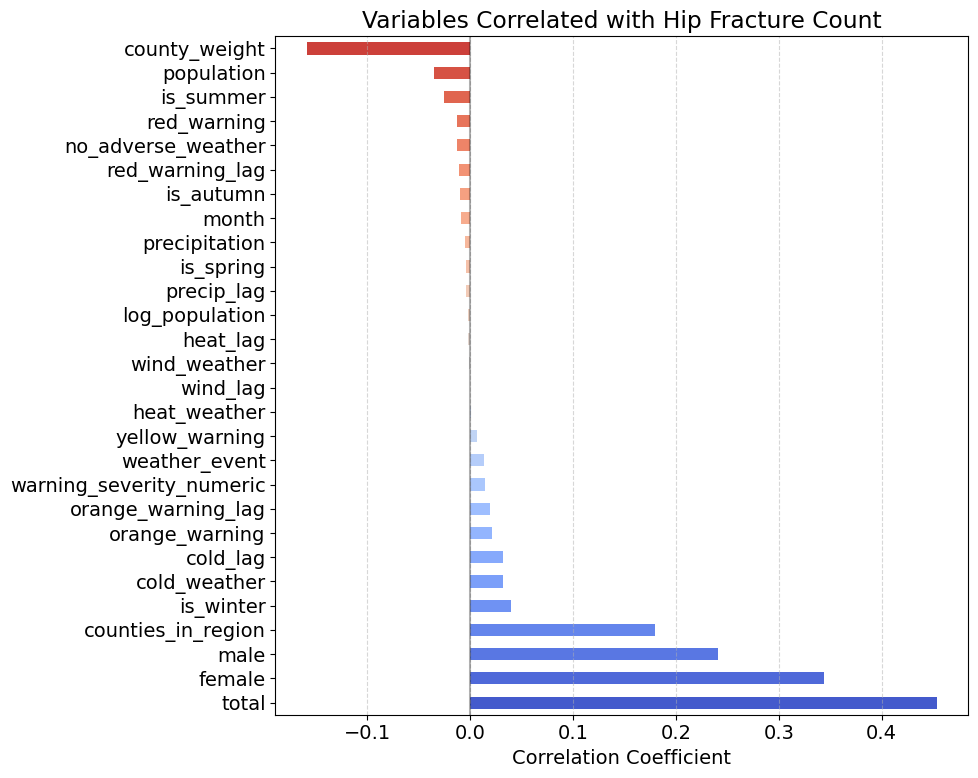

<Figure size 1500x1000 with 0 Axes>

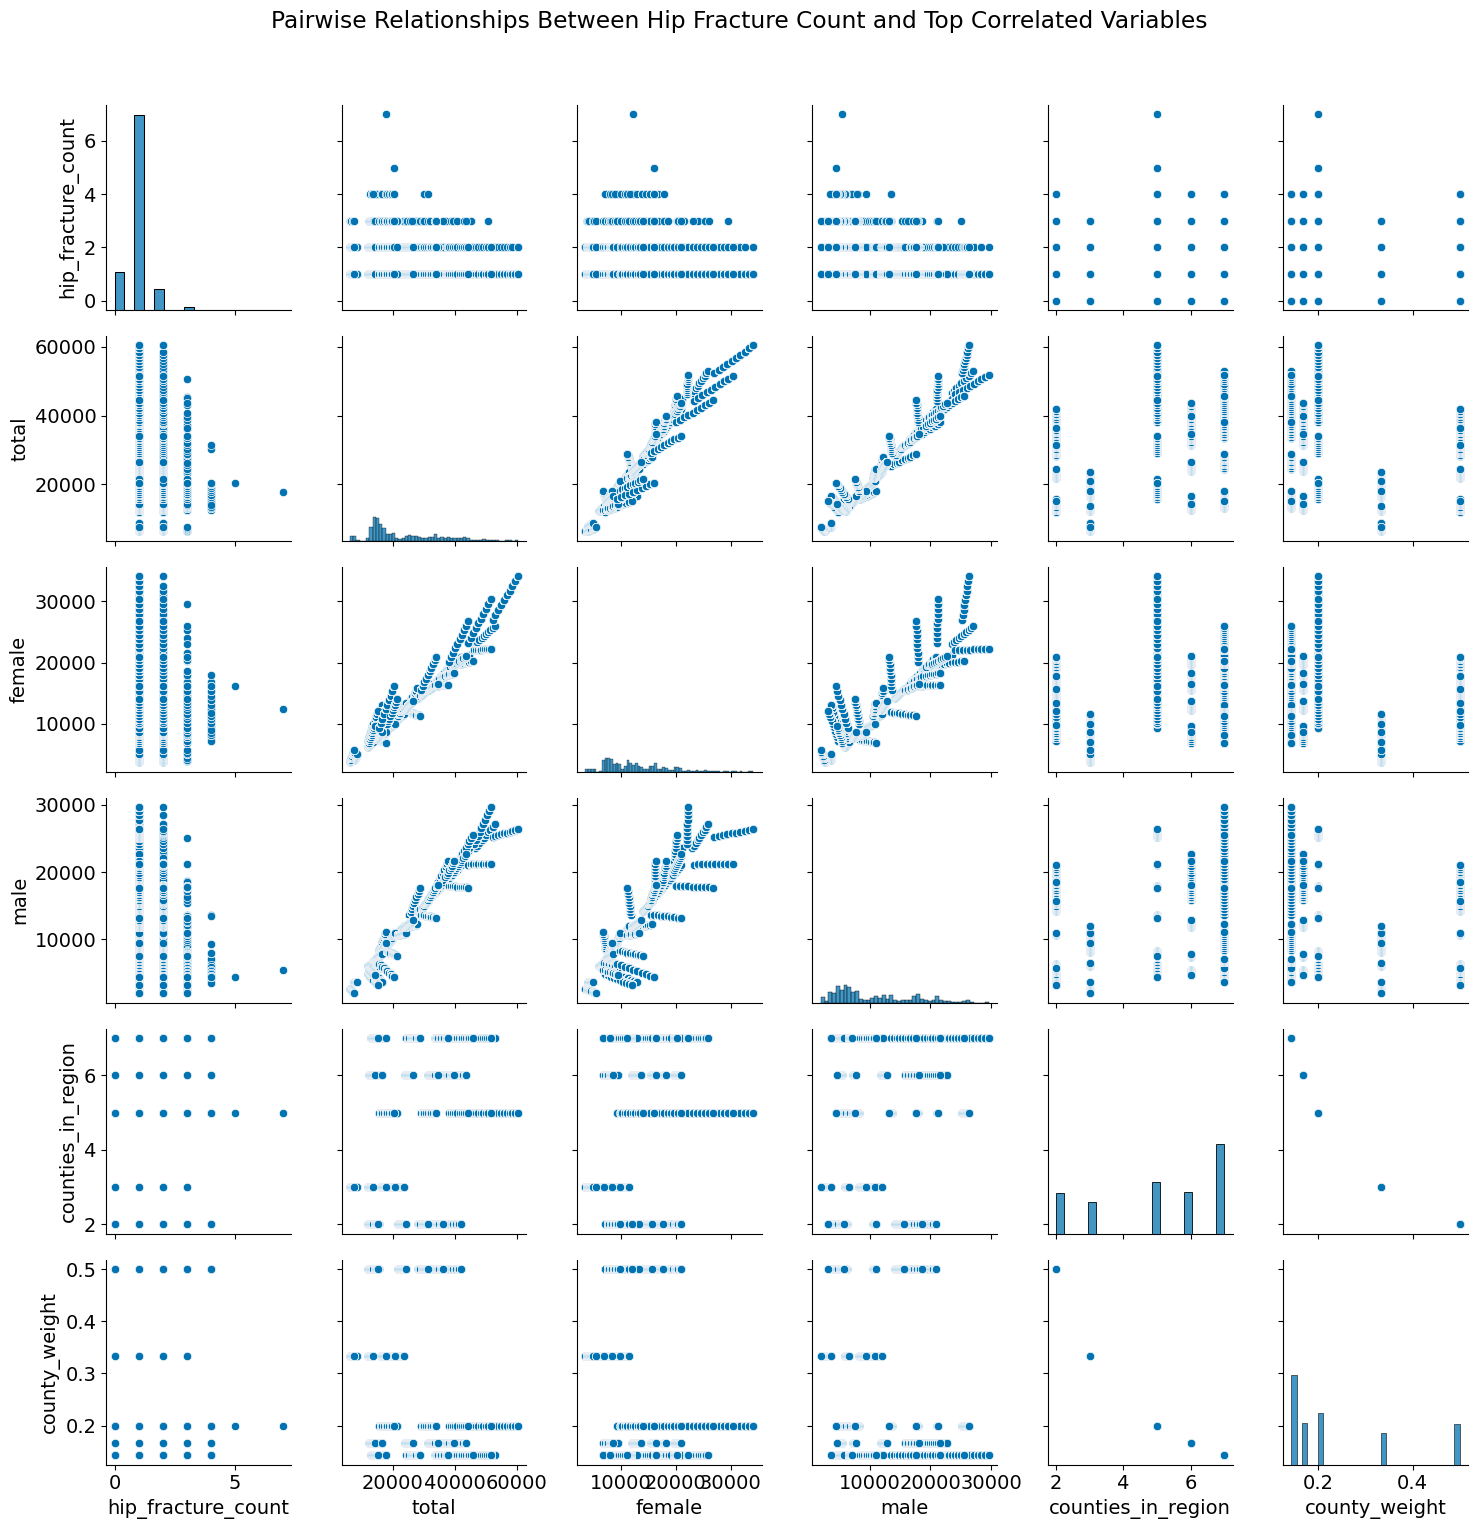

In [64]:
import matplotlib.pyplot as plt 
numeric_cols = df_final_expanded.select_dtypes(include=[np.number]).columns.tolist()

# Make sure 'hip_fracture_count' is included
if 'hip_fracture_count' not in numeric_cols:
    print("Warning: hip_fracture_count not found in numeric columns")
else:
    # Create a correlation matrix
    corr_matrix = df_final_expanded[numeric_cols].corr(method='pearson')
    
    # Sort correlations with hip_fracture_count
    hip_correlations = corr_matrix['hip_fracture_count'].sort_values(ascending=False)
    print("Correlations with hip_fracture_count:")
    print(hip_correlations)
    
    # Plot heatmap of correlations
    plt.figure(figsize=(22, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Create a bar plot of correlations with hip_fracture_count
    plt.figure(figsize=(10, 8))
    hip_correlations.drop('hip_fracture_count').plot(kind='barh', color=sns.color_palette("coolwarm", len(hip_correlations)))
    plt.title('Variables Correlated with Hip Fracture Count')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # Optional: Create pairplots for top correlated variables
    top_correlated = hip_correlations.drop('hip_fracture_count').abs().nlargest(5).index.tolist()
    top_vars = ['hip_fracture_count'] + top_correlated
    
    plt.figure(figsize=(15, 10))
    sns.pairplot(df_final[top_vars], height=2.5)
    plt.suptitle('Pairwise Relationships Between Hip Fracture Count and Top Correlated Variables', y=1.02)
    plt.tight_layout()
    plt.show()

### Step 8.2: Save complete final merged and aggregated dataset.

In [65]:
df_final_expanded.to_csv('/home/paulharford/college/project/project_data/processed/WEATHERED_merged_v2.csv', index=False)

### Step 9: Poisson Modeling
#### In ealrier testing (notebooks in archive) there was under-dispersion in te strict poisson modle so we will scale for that using a quasi-poisson modle with a scaling parameter

In [111]:
## The quasi poission model formula
#formula = """
#hip_fracture_count ~ 
#C(weather_event, Treatment(reference=0)) +
#C(warning_severity_numeric, Treatment(reference=0)) +
#C(gender, Treatment(reference='Female')) +
#counties_in_region + 
#C(region, Treatment(reference='HSE South West')):C(weather_event, Treatment(reference=0)) +
#C(gender, Treatment(reference='Female')):C(weather_event, Treatment(reference=0)) +
#C(age_group, Treatment(reference='60-64')):C(weather_event, Treatment(reference=0))
#"""

# Define your formula
#formula = """
#hip_fracture_count ~ 
#C(gender)*C(age_group) + 
#C(age_group)*C(region) +
#C(age_group) +
#C(region)*weather_event +
#C(region)*warning_severity_numeric
#"""

# Define your formula
formula = """
hip_fracture_count ~ 
C(weather_event, Treatment(reference=0)) +
C(warning_severity_numeric, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')) +
county_weight + 
C(region, Treatment(reference='HSE South West')):C(weather_event, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')):C(weather_event, Treatment(reference=0))
"""

offset = df_final_expanded["log_population"]
poisson_model = smf.glm(
    formula=formula, 
    data=df_final_expanded, 
    family=sm.families.Poisson(),offset=offset 
    )

# Fit the regular Poisson model
poisson_results_2 = poisson_model.fit()

# Calculate the dispersion parameter
dispersion = poisson_results_2.deviance / poisson_results_2.df_resid
print(f"Dispersion parameter: {dispersion:.4f}")

# Fit the quasi-Poisson model by specifying the scale parameter
quasi_poisson_results = poisson_model.fit(scale=dispersion)

# Print the summary of the quasi-Poisson model
print(quasi_poisson_results.summary())
# Optionally, check for overdispersion:
print("Residual Deviance:", quasi_poisson_results.deviance)
print("Degrees of Freedom:", quasi_poisson_results.df_resid)

Dispersion parameter: 0.9118
                 Generalized Linear Model Regression Results                  
Dep. Variable:     hip_fracture_count   No. Observations:                97119
Model:                            GLM   Df Residuals:                    97103
Model Family:                 Poisson   Df Model:                           15
Link Function:                    Log   Scale:                         0.91176
Method:                          IRLS   Log-Likelihood:                -84369.
Date:                Sun, 25 May 2025   Deviance:                       88534.
Time:                        16:17:01   Pearson chi2:                 1.35e+05
No. Iterations:                   100   Pseudo R-squ. (CS):            0.04990
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          z      P>|z|      [0.025  

### Step 9.1: Create DF with Incidence Rate Ratios (IRR) with 95% Confidence Intervals: 

In [110]:
# After fitting the quasi-Poisson model
print("\nIncidence Rate Ratios (IRR) with 95% Confidence Intervals:")
params = poisson_results_2.params
conf = poisson_results_2.conf_int()

# Create a DataFrame for better formatting
irr_df = pd.DataFrame({
    'IRR': np.exp(params),
    'Lower CI': np.exp(conf[0]),
    'Upper CI': np.exp(conf[1]),
    'p-value': poisson_results_2.pvalues
})

print(irr_df)


Incidence Rate Ratios (IRR) with 95% Confidence Intervals:
                                                          IRR  Lower CI  \
Intercept                                            0.000044  0.000043   
C(gender)[T.Male]                                    0.636694  0.622435   
weather_event                                        0.186849  0.163726   
C(region)[T.HSE Dublin and North East]:weather_...   1.444849  1.339397   
C(region)[T.HSE Dublin and South East]:weather_...   1.581898  1.465821   
C(region)[T.HSE Mid West]:weather_event              0.883324  0.797670   
C(region)[T.HSE South West]:weather_event            1.443654  1.323356   
C(region)[T.HSE West and North West]:weather_event   1.188554  1.099657   
C(age_group)[T.65-69]:weather_event                  1.718772  1.505745   
C(age_group)[T.70-74]:weather_event                  2.805024  2.480951   
C(age_group)[T.75-79]:weather_event                  4.208261  3.735596   
C(age_group)[T.80-84]:weather_event     

FITTING POISSON MODEL (BASELINE)

Poisson Dispersion parameter: 0.9118

Poisson Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:     hip_fracture_count   No. Observations:                97119
Model:                            GLM   Df Residuals:                    97103
Model Family:                 Poisson   Df Model:                           15
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76924.
Date:                Sun, 25 May 2025   Deviance:                       88534.
Time:                        16:17:17   Pearson chi2:                 1.35e+05
No. Iterations:                   100   Pseudo R-squ. (CS):            0.04560
Covariance Type:            nonrobust                                         
                                                                                                                   

/home/paulharford/anaconda3/envs/msc/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/paulharford/anaconda3/envs/msc/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Negative Binomial Model Summary:


/home/paulharford/anaconda3/envs/msc/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/paulharford/anaconda3/envs/msc/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                     NegativeBinomial Regression Results                      
Dep. Variable:     hip_fracture_count   No. Observations:                97119
Model:               NegativeBinomial   Df Residuals:                    97103
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 May 2025   Pseudo R-squ.:                 0.02862
Time:                        16:17:21   Log-Likelihood:                -76924.
converged:                      False   LL-Null:                       -79190.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

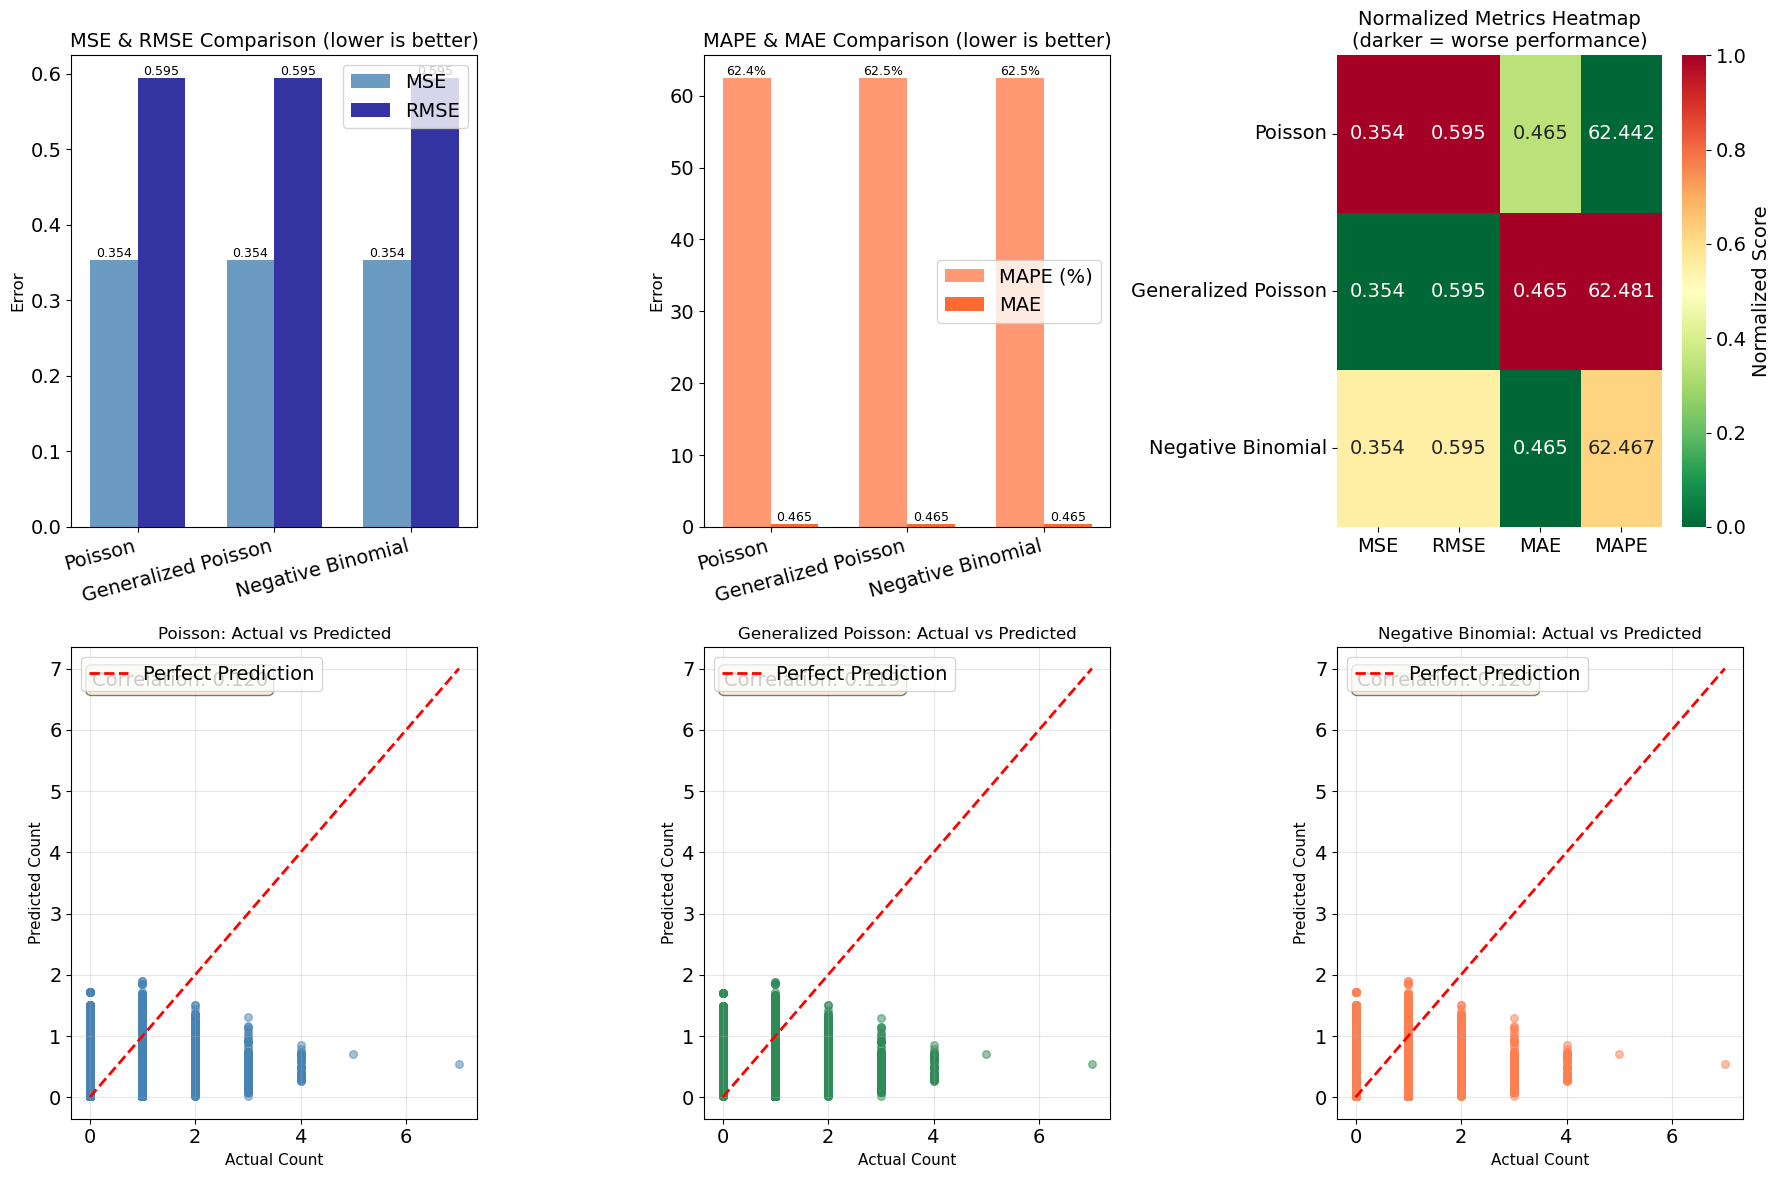

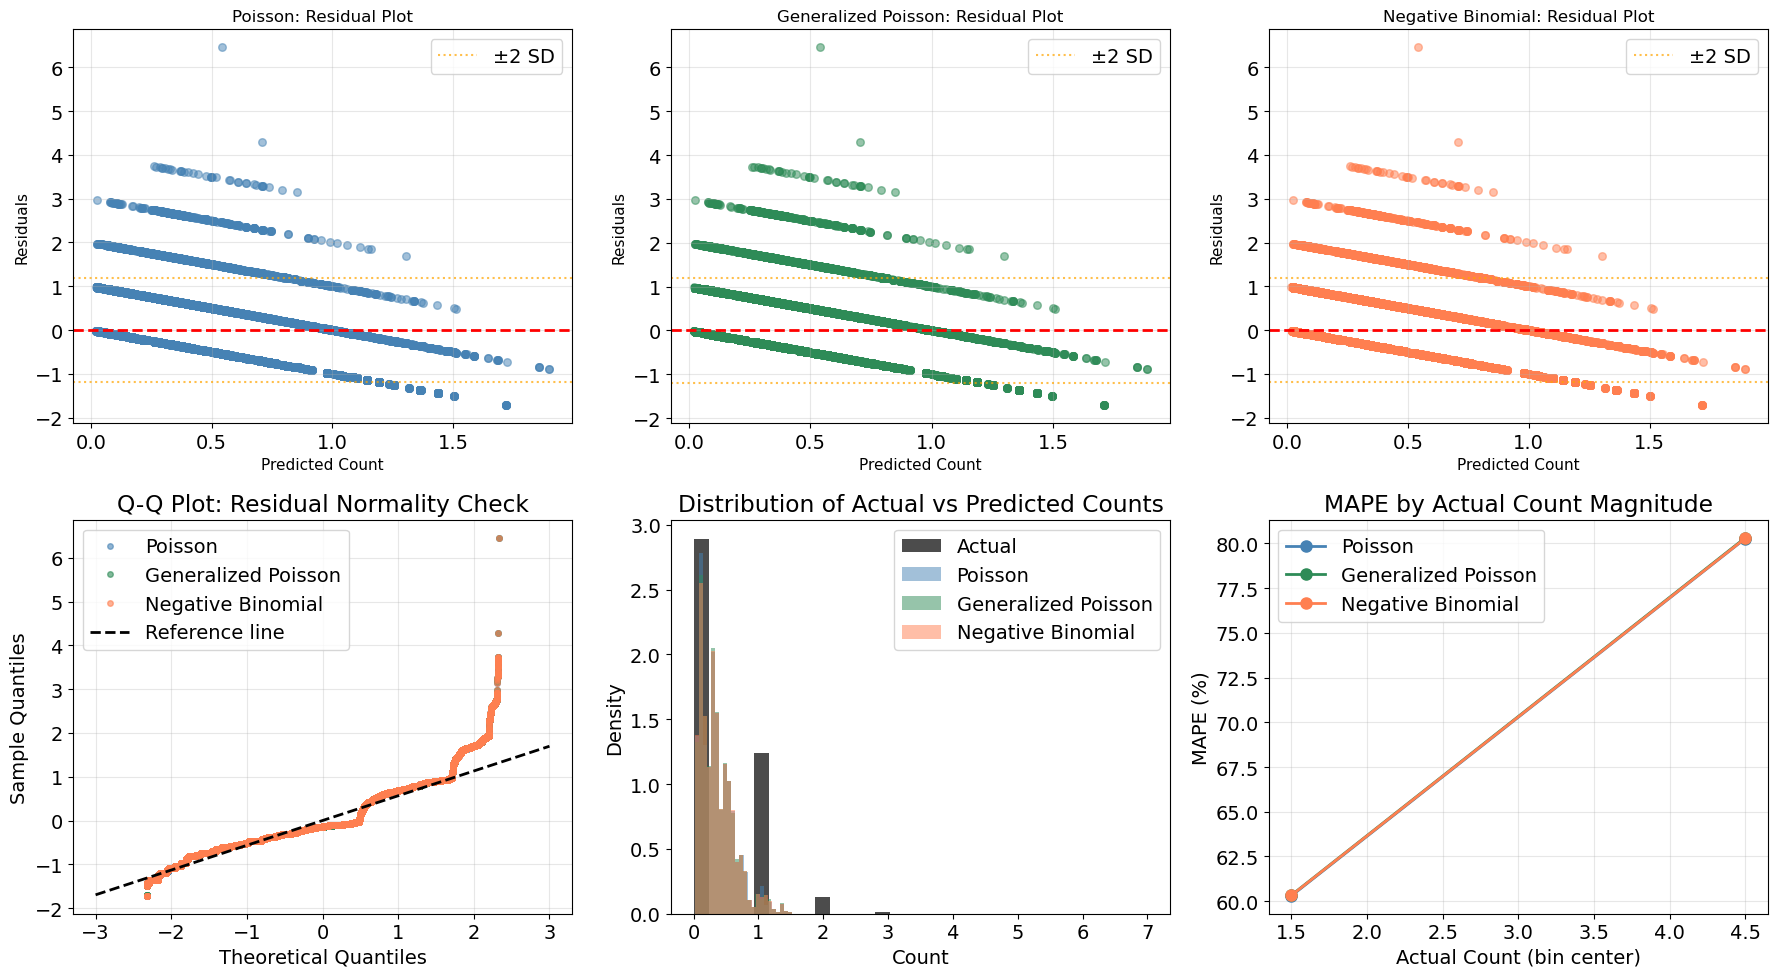


DETAILED MODEL DIAGNOSTICS

Poisson Model:
  Mean Residual: -0.0002
  Std Dev of Residuals: 0.5950
  Min/Max Residual: -1.7198 / 6.4575
  % Predictions within ±1 of actual: 94.5%
  % Predictions within ±2 of actual: 99.6%

Generalized Poisson Model:
  Mean Residual: 0.0000
  Std Dev of Residuals: 0.5948
  Min/Max Residual: -1.7090 / 6.4591
  % Predictions within ±1 of actual: 94.5%
  % Predictions within ±2 of actual: 99.6%

Negative Binomial Model:
  Mean Residual: 0.0001
  Std Dev of Residuals: 0.5949
  Min/Max Residual: -1.7169 / 6.4577
  % Predictions within ±1 of actual: 94.5%
  % Predictions within ±2 of actual: 99.6%

DISPERSION ANALYSIS
Poisson model dispersion parameter: 0.9118
Moderate underdispersion detected - Generalized Poisson may improve model fit

MODEL SELECTION RECOMMENDATION

Based on MSE, the best model is: Generalized Poisson
Based on MAPE, the best model is: Poisson

Generalized Poisson dispersion parameter (alpha): -0.0078
Negative alpha confirms underdispersio

/tmp/ipykernel_52067/3035977910.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gp_alpha = gp_results.params[-1]  # Last parameter is usually dispersion


In [112]:
# Imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import patsy
from statsmodels.discrete.discrete_model import GeneralizedPoisson
import seaborn as sns
from scipy import stats

formula = """
hip_fracture_count ~ 
C(weather_event, Treatment(reference=0)) +
C(warning_severity_numeric, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')) +
county_weight + 
C(region, Treatment(reference='HSE South West')):C(weather_event, Treatment(reference=0)) +
C(gender, Treatment(reference='Female')):C(weather_event, Treatment(reference=0))
"""
# Define the offset
offset = df_final_expanded["log_population"]

### 1. Fit Poisson Model (Baseline)
print("="*60)
print("FITTING POISSON MODEL (BASELINE)")
print("="*60)

poisson_model = smf.glm(
    formula=formula, 
    data=df_final_expanded, 
    family=sm.families.Poisson(), 
    offset=offset
)
poisson_results = poisson_model.fit()

# Dispersion estimate
dispersion = poisson_results.deviance / poisson_results.df_resid
print(f"\nPoisson Dispersion parameter: {dispersion:.4f}")

print("\nPoisson Model Summary:")
print(poisson_results.summary())

### 2. Fit Generalized Poisson Model (For Underdispersion)
print("\n" + "="*60)
print("FITTING GENERALIZED POISSON MODEL (FOR UNDERDISPERSION)")
print("="*60)

# Prepare design matrices
y, X = patsy.dmatrices(formula, data=df_final_expanded, return_type='dataframe')

# Convert y to 1D array
y_array = np.asarray(y).flatten()

try:
    gp_model = GeneralizedPoisson(endog=y_array, exog=X, offset=offset)
    gp_results = gp_model.fit(maxiter=1000, disp=False)
    
    print("\nGeneralized Poisson Model Summary:")
    print(gp_results.summary())
    gp_fitted = True
except Exception as e:
    print(f"\nGeneralized Poisson model failed: {e}")
    gp_fitted = False

### 3. Fit Negative Binomial Model (For Comparison)
print("\n" + "="*60)
print("FITTING NEGATIVE BINOMIAL MODEL (FOR COMPARISON)")
print("="*60)

try:
    nb_model = smf.negativebinomial(
        formula=formula, 
        data=df_final_expanded, 
        offset=offset
    )
    nb_results = nb_model.fit(disp=False)
    
    print("\nNegative Binomial Model Summary:")
    print(nb_results.summary())
    nb_fitted = True
except Exception as e:
    print(f"\nNegative Binomial model failed (expected for underdispersed data): {e}")
    nb_fitted = False

### 4. Functions to Calculate MSE and MAPE
def calculate_metrics(y_true, y_pred):
    """
    Calculate MSE and MAPE for model evaluation
    """
    # Ensure arrays are flattened
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    
    # MSE
    mse = np.mean((y_true - y_pred)**2)
    
    # MAPE - handle zero values
    mask = y_true != 0
    if np.sum(mask) > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = np.nan
    
    # RMSE
    rmse = np.sqrt(mse)
    
    # MAE
    mae = np.mean(np.abs(y_true - y_pred))
    
    return mse, mape, rmse, mae

### 5. Get predictions and calculate metrics for each model
# Get actual values
y_actual = df_final_expanded['hip_fracture_count'].values

# Initialize lists to store results
models_list = []
predictions_list = []
metrics_dict = {}

# Poisson predictions
poisson_pred = poisson_results.predict()
poisson_mse, poisson_mape, poisson_rmse, poisson_mae = calculate_metrics(y_actual, poisson_pred)
models_list.append('Poisson')
predictions_list.append(poisson_pred)
metrics_dict['Poisson'] = (poisson_mse, poisson_mape, poisson_rmse, poisson_mae)

# Generalized Poisson predictions
if gp_fitted:
    gp_pred = gp_results.predict()
    gp_mse, gp_mape, gp_rmse, gp_mae = calculate_metrics(y_actual, gp_pred)
    models_list.append('Generalized Poisson')
    predictions_list.append(gp_pred)
    metrics_dict['Generalized Poisson'] = (gp_mse, gp_mape, gp_rmse, gp_mae)

# Negative Binomial predictions
if nb_fitted:
    nb_pred = nb_results.predict()
    nb_mse, nb_mape, nb_rmse, nb_mae = calculate_metrics(y_actual, nb_pred)
    models_list.append('Negative Binomial')
    predictions_list.append(nb_pred)
    metrics_dict['Negative Binomial'] = (nb_mse, nb_mape, nb_rmse, nb_mae)

# Print comparison
print("\n" + "="*60)
print("MODEL COMPARISON - PREDICTION METRICS")
print("="*60)
for model_name, (mse, mape, rmse, mae) in metrics_dict.items():
    print(f"\n{model_name} Model:")
    print(f"  MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}, MAPE: {mape:.2f}%")

# Check if predictions are different
print("\n" + "="*60)
print("CHECKING PREDICTION DIFFERENCES")
print("="*60)
if len(predictions_list) > 1:
    for i in range(len(predictions_list)-1):
        for j in range(i+1, len(predictions_list)):
            diff = np.mean(np.abs(predictions_list[i] - predictions_list[j]))
            max_diff = np.max(np.abs(predictions_list[i] - predictions_list[j]))
            print(f"\n{models_list[i]} vs {models_list[j]}:")
            print(f"  Mean absolute difference: {diff:.6f}")
            print(f"  Max absolute difference: {max_diff:.6f}")

### 6. Visualization Suite

# Create a figure with multiple subplots
n_models = len(models_list)
fig = plt.figure(figsize=(18, 12))

# Define colors for consistency
colors = ['steelblue', 'seagreen', 'coral'][:n_models]

# 1. Metrics Comparison Bar Plot - MSE and RMSE
ax1 = plt.subplot(2, 3, 1)
x = np.arange(len(models_list))
width = 0.35

mse_values = [metrics_dict[m][0] for m in models_list]
rmse_values = [metrics_dict[m][2] for m in models_list]

bars1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, rmse_values, width, label='RMSE', color='darkblue', alpha=0.8)

ax1.set_ylabel('Error', fontsize=12)
ax1.set_title('MSE & RMSE Comparison (lower is better)', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(models_list, rotation=15, ha='right')
ax1.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. MAPE and MAE Comparison
ax2 = plt.subplot(2, 3, 2)
mape_values = [metrics_dict[m][1] for m in models_list]
mae_values = [metrics_dict[m][3] for m in models_list]

bars3 = ax2.bar(x - width/2, mape_values, width, label='MAPE (%)', color='coral', alpha=0.8)
bars4 = ax2.bar(x + width/2, mae_values, width, label='MAE', color='orangered', alpha=0.8)

ax2.set_ylabel('Error', fontsize=12)
ax2.set_title('MAPE & MAE Comparison (lower is better)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(models_list, rotation=15, ha='right')
ax2.legend()

# Add value labels
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 3. Combined Metrics Heatmap
ax3 = plt.subplot(2, 3, 3)
metrics_data = np.array([[metrics_dict[m][0], metrics_dict[m][2], metrics_dict[m][3], metrics_dict[m][1]] 
                         for m in models_list])

# Normalize each metric to 0-1 scale for visualization
metrics_normalized = metrics_data.copy()
for i in range(metrics_data.shape[1]):
    col = metrics_data[:, i]
    if col.max() != col.min():
        metrics_normalized[:, i] = (col - col.min()) / (col.max() - col.min())
    else:
        metrics_normalized[:, i] = 0

sns.heatmap(metrics_normalized, 
            xticklabels=['MSE', 'RMSE', 'MAE', 'MAPE'],
            yticklabels=models_list,
            annot=metrics_data, fmt='.3f', cmap='RdYlGn_r', ax=ax3,
            cbar_kws={'label': 'Normalized Score'})
ax3.set_title('Normalized Metrics Heatmap\n(darker = worse performance)', fontsize=14)

# 4-6. Actual vs Predicted Scatter Plots
for idx, (pred, model_name, color) in enumerate(zip(predictions_list[:3], models_list[:3], colors)):
    ax = plt.subplot(2, 3, 4 + idx)
    ax.scatter(y_actual, pred, alpha=0.5, s=30, color=color)
    
    # Add perfect prediction line
    max_val = max(y_actual.max(), pred.max())
    ax.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Add correlation coefficient
    corr = np.corrcoef(y_actual, pred)[0, 1]
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_xlabel('Actual Count', fontsize=11)
    ax.set_ylabel('Predicted Count', fontsize=11)
    ax.set_title(f'{model_name}: Actual vs Predicted', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional diagnostic plots
fig2, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1-3. Residual Plots
for idx, (pred, model_name, color) in enumerate(zip(predictions_list[:3], models_list[:3], colors)):
    if idx < len(axes[0]):
        ax = axes[0, idx]
        residuals = y_actual - pred
        
        ax.scatter(pred, residuals, alpha=0.5, s=30, color=color)
        ax.axhline(y=0, color='r', linestyle='--', lw=2)
        
        # Add residual statistics
        res_std = np.std(residuals)
        ax.axhline(y=2*res_std, color='orange', linestyle=':', alpha=0.7, label='±2 SD')
        ax.axhline(y=-2*res_std, color='orange', linestyle=':', alpha=0.7)
        
        ax.set_xlabel('Predicted Count', fontsize=11)
        ax.set_ylabel('Residuals', fontsize=11)
        ax.set_title(f'{model_name}: Residual Plot', fontsize=12)
        ax.legend()
        ax.grid(True, alpha=0.3)

# 4. Q-Q plot for residuals
ax = axes[1, 0]
for idx, (pred, model_name, color) in enumerate(zip(predictions_list, models_list, colors)):
    residuals = y_actual - pred
    stats.probplot(residuals, dist="norm", plot=None)
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals)))
    theoretical_quantiles.sort()
    residuals_sorted = np.sort(residuals)
    ax.plot(theoretical_quantiles, residuals_sorted, 'o', alpha=0.6, label=model_name, 
            color=color, markersize=4)

ax.plot([-3, 3], [-3*np.std(y_actual), 3*np.std(y_actual)], 'k--', lw=2, label='Reference line')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
ax.set_title('Q-Q Plot: Residual Normality Check')
ax.legend()
ax.grid(True, alpha=0.3)

# 5. Distribution of predictions
ax = axes[1, 1]
ax.hist(y_actual, bins=30, alpha=0.7, label='Actual', color='black', density=True)
for idx, (pred, model_name, color) in enumerate(zip(predictions_list, models_list, colors)):
    ax.hist(pred, bins=30, alpha=0.5, label=model_name, color=color, density=True)
ax.set_xlabel('Count')
ax.set_ylabel('Density')
ax.set_title('Distribution of Actual vs Predicted Counts')
ax.legend()

# 6. Model performance by prediction magnitude
ax = axes[1, 2]
n_bins = 10
for idx, (pred, model_name, color) in enumerate(zip(predictions_list, models_list, colors)):
    # Create bins based on actual values
    bin_edges = np.percentile(y_actual[y_actual > 0], np.linspace(0, 100, n_bins + 1))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    mape_by_bin = []
    for i in range(n_bins):
        mask = (y_actual >= bin_edges[i]) & (y_actual < bin_edges[i+1]) & (y_actual > 0)
        if np.sum(mask) > 0:
            bin_mape = np.mean(np.abs((y_actual[mask] - pred[mask]) / y_actual[mask])) * 100
            mape_by_bin.append(bin_mape)
        else:
            mape_by_bin.append(np.nan)
    
    ax.plot(bin_centers, mape_by_bin, 'o-', label=model_name, color=color, 
            linewidth=2, markersize=8)

ax.set_xlabel('Actual Count (bin center)')
ax.set_ylabel('MAPE (%)')
ax.set_title('MAPE by Actual Count Magnitude')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n" + "="*60)
print("DETAILED MODEL DIAGNOSTICS")
print("="*60)

for pred, model_name in zip(predictions_list, models_list):
    residuals = y_actual - pred
    print(f"\n{model_name} Model:")
    print(f"  Mean Residual: {np.mean(residuals):.4f}")
    print(f"  Std Dev of Residuals: {np.std(residuals):.4f}")
    print(f"  Min/Max Residual: {np.min(residuals):.4f} / {np.max(residuals):.4f}")
    print(f"  % Predictions within ±1 of actual: {np.mean(np.abs(residuals) <= 1)*100:.1f}%")
    print(f"  % Predictions within ±2 of actual: {np.mean(np.abs(residuals) <= 2)*100:.1f}%")
    
# Dispersion analysis
print("\n" + "="*60)
print("DISPERSION ANALYSIS")
print("="*60)
print(f"Poisson model dispersion parameter: {dispersion:.4f}")
if dispersion < 0.8:
    print("Strong evidence of underdispersion - Generalized Poisson should perform better than standard Poisson")
elif dispersion < 1.0:
    print("Moderate underdispersion detected - Generalized Poisson may improve model fit")
elif dispersion > 1.2:
    print("Overdispersion detected - Negative Binomial might be appropriate")
else:
    print("Little evidence of over/underdispersion - Poisson model may be adequate")

# Model selection recommendation
print("\n" + "="*60)
print("MODEL SELECTION RECOMMENDATION")
print("="*60)

best_model = min(metrics_dict.items(), key=lambda x: x[1][0])[0]  # Based on MSE
print(f"\nBased on MSE, the best model is: {best_model}")

best_model_mape = min(metrics_dict.items(), key=lambda x: x[1][1])[0]  # Based on MAPE
print(f"Based on MAPE, the best model is: {best_model_mape}")

if gp_fitted:
    # Extract dispersion parameter from Generalized Poisson
    try:
        gp_alpha = gp_results.params[-1]  # Last parameter is usually dispersion
        print(f"\nGeneralized Poisson dispersion parameter (alpha): {gp_alpha:.4f}")
        if gp_alpha < 0:
            print("Negative alpha confirms underdispersion in the data")
        elif gp_alpha > 0:
            print("Positive alpha indicates overdispersion")
        else:
            print("Alpha ≈ 0 indicates equidispersion (similar to Poisson)")
    except:
        pass
